In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load dataset
df = pd.read_csv("/content/AirPassengers.csv")

# Convert 'Month' to datetime and set as index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)


In [ ]:
# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['#Passengers']])

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

SEQ_LEN = 12  # using past 12 months
X, y = create_sequences(scaled_data, SEQ_LEN)

# Split into training and testing
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [ ]:
# Build LSTM model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(SEQ_LEN, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 282ms/step - loss: 0.1012 - val_loss: 0.2890
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0602 - val_loss: 0.1965
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0365 - val_loss: 0.0975
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0162 - val_loss: 0.0239
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0140 - val_loss: 0.0227
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0111 - val_loss: 0.0393
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0103 - val_loss: 0.0293
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0083 - val_loss: 0.0201
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0075 - val_loss: 0.0204
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0077 - val_loss: 0.0217
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0052 - val_loss: 0.0210
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0060 - val_loss: 0.0244
Epoch 13/50

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


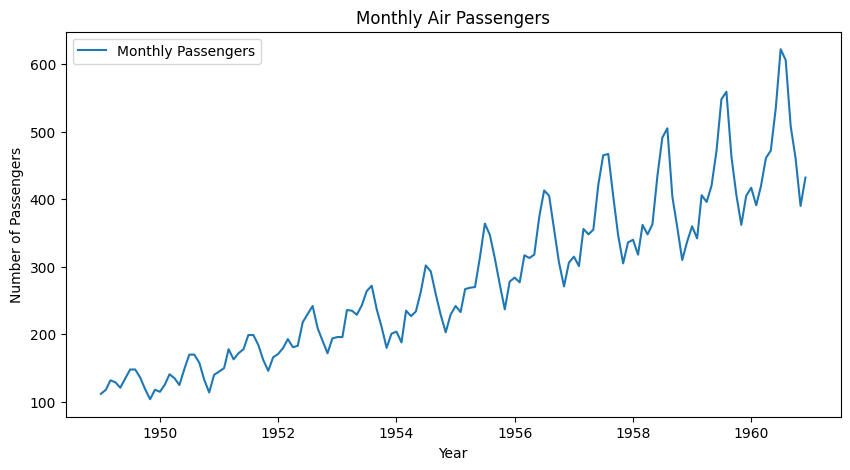

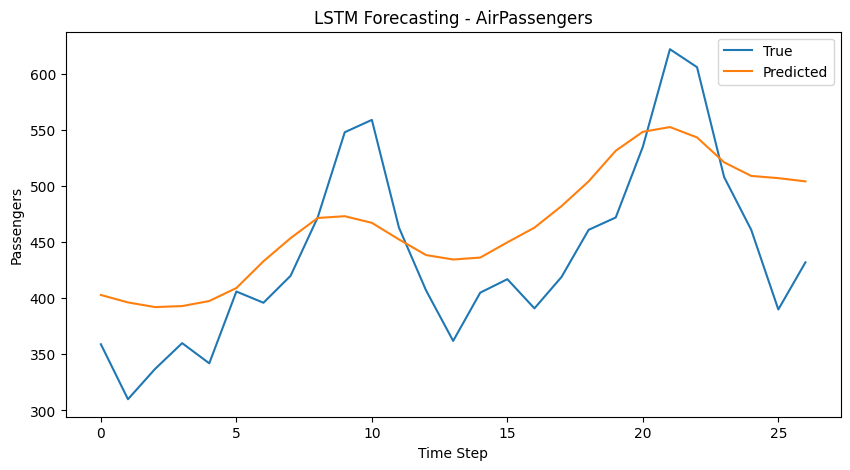

In [ ]:
# Predict
predicted = model.predict(X_test)

# Inverse scale
predicted_inv = scaler.inverse_transform(predicted)
y_test_inv = scaler.inverse_transform(y_test)

# Visualize
plt.figure(figsize=(10,5))
plt.plot(df['#Passengers'], label='Monthly Passengers')
plt.title("Monthly Air Passengers")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

# Plot results
plt.figure(figsize=(10,5))
plt.plot(y_test_inv, label='True')
plt.plot(predicted_inv, label='Predicted')
plt.title("LSTM Forecasting - AirPassengers")
plt.xlabel("Time Step")
plt.ylabel("Passengers")
plt.legend()
plt.show()
